In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

C:\Users\raghu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection and Analysis

In [2]:
data = pd.read_csv("C:\\Users\\raghu\\Downloads\\Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Age'>

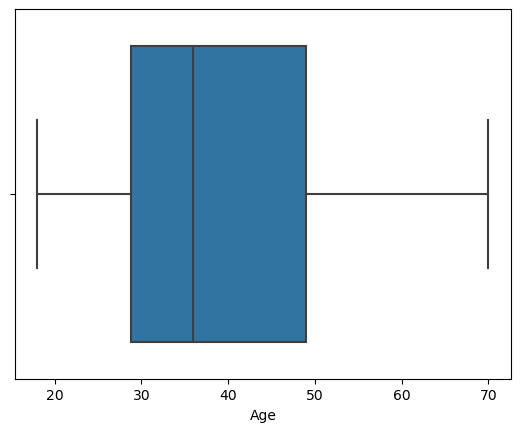

In [12]:
sns.boxplot(x="Age",data=data)

In [15]:
data.select_dtypes(include="int64")

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


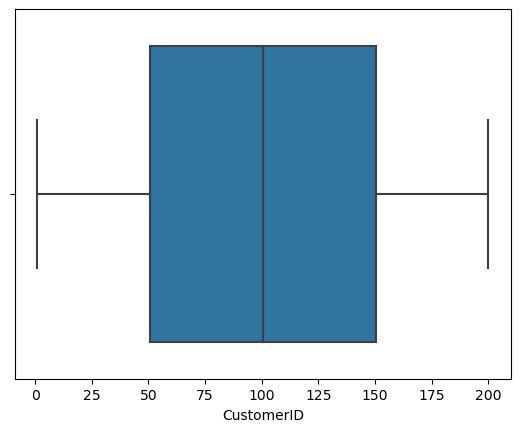

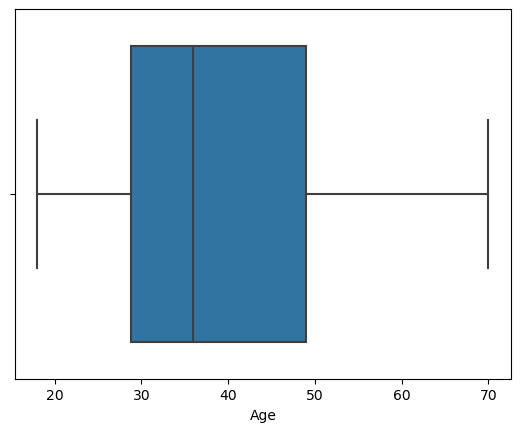

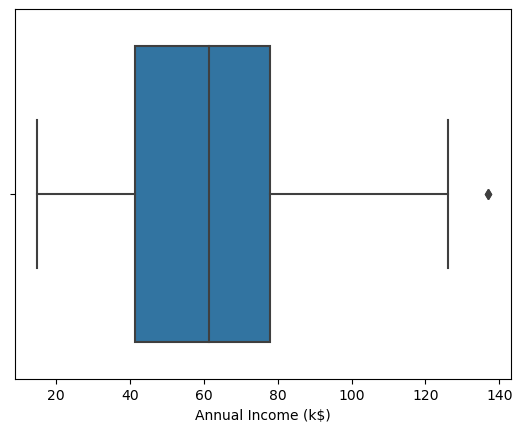

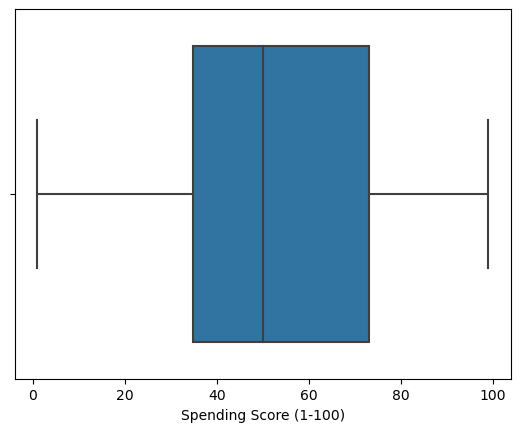

In [18]:
for i in data.select_dtypes(include="int64"):
    sns.boxplot(x=i,data=data)
    plt.show()
    

# Machine Learning Process

 ## Choosing the Annual Income and spending score column

In [27]:
X=data.iloc[:,3:5].values #:->rows and 3:5->columns

In [28]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the number of clusters

# Wcss means within cluster sum of squares .It helps to calculate how many clusters are there in our dataset

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
wcss=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X) #make the clusters on the given data
    wcss.append(kmeans.inertia_)

In [38]:
wcss

[181665.82312925172,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30241.343617936593,
 25009.3117835985,
 21862.092672182887,
 19664.685196005543]

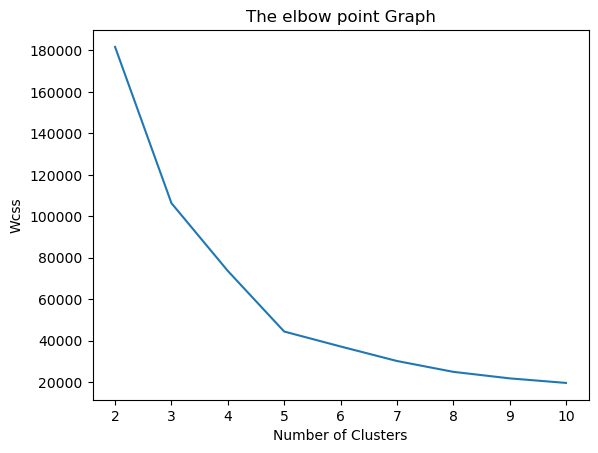

In [46]:
# Elbow plot
plt.plot(range(2,11),wcss)
plt.title('The elbow point Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()

In [47]:
# There are two bends and we have to take that bend after which the graph is totally flat
#therfore k=5

In [48]:
# And there are no need more clusters because the graph has already got flat

# Optimal no. of clusters =5

   # Training the k-means clustering model

In [49]:
kmeans=KMeans(n_clusters=5,init="k-means++")
kmeans.fit(X) #creates the clusters

KMeans(n_clusters=5)

In [54]:
Y=kmeans.fit_predict(X)

In [55]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [59]:
output=pd.DataFrame(Y,columns=['cluster_number'])

In [60]:
output

,cluster_number
0,3
1,4
2,3
3,4
4,3
...,...
195,1
196,2
197,1
198,2


In [65]:
final_data=pd.concat([data,output],axis=1)

In [66]:
final_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_number
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2
